# 초기화

In [1]:
from cgitb import reset
from ctypes.wintypes import BOOL
from os import sep
from pickle import TRUE
import wave
from dataclasses import dataclass, asdict

import matplotlib.pyplot as plt
from IPython.display import Audio
from IPython import display
import IPython.display as ipd
import pyaudio
import librosa
import librosa.display
import numpy as np
from matplotlib import cm

from spleeter.separator import Separator
from spleeter.audio.adapter import AudioAdapter
from multiprocessing import freeze_support
import time 
import warnings
warnings.filterwarnings('ignore')
import numpy
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
from scipy.io.wavfile import write

In [10]:
CHUNK = 1024             # samples per frame
FORMAT = pyaudio.paInt16    # audio format (bytes per sample?)
CHANNELS = 2                 # single channel for microphone
RATE = 44100                 # samples per second
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

In [21]:
from tkinter import *
from tkinter import messagebox
import tkinter
from tkinter.tix import COLUMN
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
frames = []

class Tester_GUI(tkinter.Tk):
  
    def __init__(self,parent):
        #play button
        tkinter.Tk.__init__(self, parent)
        self.parent = parent
        self.init_GUI()
        self.init_plot()
        self.p = pyaudio.PyAudio()
        self.frames = []
        self.is_recording = 0
        self.stream = None
        self.data_list = []
        self.vocal_list = np.zeros([CHUNK,CHANNELS])
        self.time_list = []
        self.audio_data = np.zeros([CHUNK,CHANNELS])
        self.norm_audio_data = None
        self.separator = Separator(f"spleeter:2stems") # 새로만든거
        
    def init_GUI(self):
        self.grid()
        self.title('spleeter demo')
        self.btn = tkinter.Button(self, text="Play", command=self.okClick)
        self.btn.grid(column=0, row=0)
        
        # vocal_slider
        self.lbl = tkinter.Label(self, text="Vocal")
        self.lbl.grid(column=0, row=1)
        self.w = tkinter.Scale(self, from_=0, to=100, orient=HORIZONTAL)
        self.w.grid(column=1, row=1)

        # BGM_slider
        self.lbl2 = tkinter.Label(self, text="BGM")
        self.lbl2.grid(column=0, row=2)
        self.w2 = tkinter.Scale(self, from_=0, to=100, orient=HORIZONTAL)
        self.w2.grid(column=1, row=2)
            
    def init_plot(self):
        self.fig, ax1 = plt.subplots(1, figsize=(6, 6))
        x = np.arange(0, CHUNK, 1)
        self.line, = ax1.plot(x, np.zeros(CHUNK,int), '-', lw=2)
        ax1.set_title('AUDIO WAVEFORM')
        ax1.set_xlabel('samples')
        ax1.set_ylabel('volume')
        ax1.set_ylim(0, 1)
        ax1.set_xlim(0, CHUNK)
        plt.setp(ax1, xticks=[0, CHUNK/2 ,CHUNK], yticks=[0, 0.5, 1])
        self.wave_canvas = FigureCanvasTkAgg(self.fig, master=self) #
        self.wave_canvas.get_tk_widget().grid(column=0, row=3, columnspan=2)  
    

                    
    def okClick(self):
        # y, sr = librosa.load('music.mp3')
        self.stream = self.p.open(format=FORMAT,
                                channels=CHANNELS,
                                rate=RATE,
                                input=True,
                                output=False,
                                frames_per_buffer=CHUNK,
                                input_device_index = 22, ## HDMI 뽑고 2로 설정, HDMI 물리면 웅웅거리는 소리 들림
                                stream_callback = self.get_callback())
        # recording flipping
        if self.is_recording :
            self.stream.stop_stream()
            self.is_recording = 0 
            self.audio_data = numpy.array(self.data_list)
#             write("example.wav", RATE, self.audio_data)
#             write("v.wav", RATE, self.vocal_list)
            filename = "1.wav"
            waveFile = wave.open(filename, 'wb')
            waveFile.setnchannels(CHANNELS)
            waveFile.setsampwidth(2)
            waveFile.setframerate(RATE)
            waveFile.writeframes(b''.join(self.data_list))
            waveFile.close()
        else :
            self.stream.start_stream()
            self.is_recording = 1
        
    def get_callback(self):
        def callback(in_data, frame_count, time_info, status):
            if self.is_recording :  
#                data = np.frombuffer(in_data, dtype=np.float32)
               self.data_list.append(in_data)

            return (in_data, pyaudio.paContinue)
        return callback      

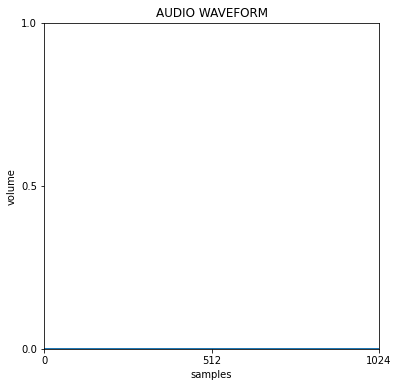

In [23]:
if __name__ == "__main__":
    app = Tester_GUI(None)
    app.title = "test"
    app.mainloop()

In [ ]:
j=22
info = app.p.get_device_info_by_index(j)
print("%s \n" % (info))

for i in range(0, p.get_device_count()):
    info = app.p.get_device_info_by_index(i)
    print(str(info["index"])+": \t %s \n \t %s \n" % (info["name"], app.p.get_host_api_info_by_index(info["hostApi"])["name"]))


In [70]:
app.p.get_default_input_device_info()

{'index': 1,
 'structVersion': 2,
 'name': 'VoiceMeeter Output(VB-Audio Voi',
 'hostApi': 0,
 'maxInputChannels': 8,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [64]:
app.stream = app.p.open(format=FORMAT,
                                channels=CHANNELS,
                                rate=RATE,
                                input=True,
                                output=False,
                                frames_per_buffer = CHUNK,
                                input_device_index = 2, ## HDMI 뽑고 2로 설정, HDMI 물리면 웅웅거리는 소리 들림
                       )


In [69]:
j=7
info = app.p.get_device_info_by_index(j)
print("%s \n" % (info))

for i in range(0, p.get_device_count()):
    info = app.p.get_device_info_by_index(i)
    print(str(info["index"])+": \t %s \n \t %s \n" % (info["name"], app.p.get_host_api_info_by_index(info["hostApi"])["name"]))


{'index': 7, 'structVersion': 2, 'name': 'LG ULTRAFINE(5- HD Audio Driver', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0} 

0: 	 Microsoft Sound Mapper - Input 
 	 MME 

1: 	 VoiceMeeter Output(VB-Audio Voi 
 	 MME 

2: 	 마이크 배열(디지털 마이크용 인텔® 스마트 사운드 기술) 
 	 MME 

3: 	 스테레오 믹스(Realtek(R) Audio) 
 	 MME 

4: 	 Microsoft Sound Mapper - Output 
 	 MME 

5: 	 VoiceMeeter Input(VB-Audio Voic 
 	 MME 

6: 	 스피커(Realtek(R) Audio) 
 	 MME 

7: 	 LG ULTRAFINE(5- HD Audio Driver 
 	 MME 

8: 	 주 사운드 캡처 드라이버 
 	 Windows DirectSound 

9: 	 VoiceMeeter Output(VB-Audio VoiceMeeter VAIO) 
 	 Windows DirectSound 

10: 	 마이크 배열(디지털 마이크용 인텔® 스마트 사운드 기술) 
 	 Windows DirectSound 

11: 	 스테레오 믹스(Realtek(R) Audio) 
 	 Windows DirectSound 

12: 	 주 사운드 드라이버 
 	 Windows DirectSound 

13: 	 VoiceMeeter Input(VB-Audio VoiceMeeter VAIO) 
 

In [34]:
x_list = numpy.array(app.data_list)
x_list.shape
separator = Separator(f"spleeter:2stems")
# audio_loader = AudioAdapter.default()
# waveform, _ = audio_loader.load('piano.wav', sample_rate=RATE)
m_ticks = time.time() 
prediction = separator.separate(x_list)
n_ticks = time.time()-m_ticks
print("%.4f" %n_ticks)
write("v.wav", RATE, prediction['vocals'])
write("a.wav", RATE, prediction['accompaniment'])

INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:tensorflow:Restoring parameters from pretrained_models\2stems\model
2.0081


In [92]:
write("v.wav", RATE, prediction['vocals'])
write("a.wav", RATE, prediction['accompaniment'])

In [101]:
cc = np.concatenate((prediction['vocals'],prediction['accompaniment']),axis=0)

In [36]:
x_list.shape

(15360, 2)

In [40]:
x_list.shape

(15360, 2)

In [50]:
data = np.reshape(x_list, (15360, channels))
data = [data[:, i]
        for i in range(channels)]
audio_data = np.zeros([channels, 15360])
audio_data[:, :] = data
write("v.wav", RATE, audio_data)

error: argument out of range

NameError: name 'audio_Data' is not defined

In [105]:
prediction['vocals'].shape

(610304, 2)

In [103]:
cc.shape

(1220608, 2)

In [11]:
j=22
info = p.get_device_info_by_index(j)
print("%s \n" % (info))

for i in range(0, p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(str(info["index"])+": \t %s \n \t %s \n" % (info["name"], p.get_host_api_info_by_index(info["hostApi"])["name"]))


{'index': 22, 'structVersion': 2, 'name': 'VoiceMeeter Output(VB-Audio VoiceMeeter VAIO)', 'hostApi': 3, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.003, 'defaultLowOutputLatency': 0.0, 'defaultHighInputLatency': 0.01, 'defaultHighOutputLatency': 0.0, 'defaultSampleRate': 44100.0} 

0: 	 Microsoft Sound Mapper - Input 
 	 MME 

1: 	 VoiceMeeter Output(VB-Audio Voi 
 	 MME 

2: 	 마이크 배열(디지털 마이크용 인텔® 스마트 사운드 기술) 
 	 MME 

3: 	 스테레오 믹스(Realtek(R) Audio) 
 	 MME 

4: 	 Microsoft Sound Mapper - Output 
 	 MME 

5: 	 VoiceMeeter Input(VB-Audio Voic 
 	 MME 

6: 	 스피커(Realtek(R) Audio) 
 	 MME 

7: 	 LG ULTRAFINE(5- HD Audio Driver 
 	 MME 

8: 	 주 사운드 캡처 드라이버 
 	 Windows DirectSound 

9: 	 VoiceMeeter Output(VB-Audio VoiceMeeter VAIO) 
 	 Windows DirectSound 

10: 	 마이크 배열(디지털 마이크용 인텔® 스마트 사운드 기술) 
 	 Windows DirectSound 

11: 	 스테레오 믹스(Realtek(R) Audio) 
 	 Windows DirectSound 

12: 	 주 사운드 드라이버 
 	 Windows DirectSound 

13: 	 VoiceMeeter Input(VB-Audio VoiceM

In [20]:
info

{'index': 1,
 'structVersion': 2,
 'name': 'VoiceMeeter Output(VB-Audio Voi',
 'hostApi': 0,
 'maxInputChannels': 8,
 'maxOutputChannels': 0,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

{'index': 1, 'structVersion': 2, 'name': 'VoiceMeeter Output(VB-Audio Voi', 'hostApi': 0, 'maxInputChannels': 8, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0} 



In [9]:
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=False,
                frames_per_buffer=CHUNK,
                input_device_index = 1, ## HDMI 뽑고 2로 설정, HDMI 물리면 웅웅거리는 소리 들림
                )

recorded_frames.append(stream.read(CHUNK))
write("test.wav", RATE, recorded_frames)

AttributeError: 'list' object has no attribute 'dtype'

In [ ]:
S_full, phase = librosa.magphase(librosa.stft(prediction['vocals']))
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                             y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)  
    
# ipd.Audio('short_one.wav') # load a local WAV file 

INFO:tensorflow:Apply unet for vocals_spectrogram
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:tensorflow:Restoring parameters from pretrained_models\2stems\model
12.3721


ParameterError: Invalid shape for monophonic audio: ndim=2, shape=(11881472, 2)

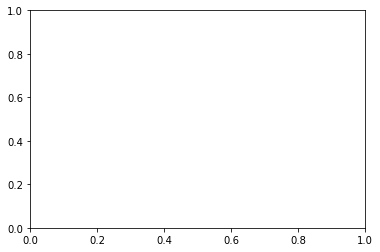

In [74]:
separator = Separator(f"spleeter:2stems")
audio_loader = AudioAdapter.default()
waveform, _ = audio_loader.load('piano.wav', sample_rate=RATE)
m_ticks = time.time() 
prediction = separator.separate(waveform)
n_ticks = time.time()-m_ticks
print("%.4f" %n_ticks)
fig, ax = plt.subplots()
S_full, phase = librosa.magphase(librosa.stft(prediction['vocals']))
img = librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                             y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)  
    
# ipd.Audio('short_one.wav') # load a local WAV file

In [78]:
waveform

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       ...,
       [-0.00024414, -0.00015259],
       [-0.00024414, -0.00015259],
       [-0.00021362, -0.00012207]], dtype=float32)